In [1]:
import json
import party_grouping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
party_grouping.party_metadata

{1: {'name': 'FDP.Die Liberalen', 'group': 'conservative'},
 2: {'name': 'Christlichdemokratische Volkspartei der Schweiz',
  'group': 'middle'},
 3: {'name': 'Sozialdemokratische Partei der Schweiz', 'group': 'left'},
 4: {'name': 'Schweizerische Volkspartei', 'group': 'conservative'},
 5: {'name': 'Liberale Partei der Schweiz', 'group': 'conservative'},
 6: {'name': 'Landesring der Unabhängigen', 'group': 'conservative'},
 7: {'name': 'Evangelische Volkspartei der Schweiz', 'group': 'middle'},
 8: {'name': 'Christlichsoziale Partei', 'group': 'middle'},
 9: {'name': 'Partei der Arbeit / Solidarität', 'group': 'left'},
 12: {'name': 'Grün-Alternative (inkl. POCH)', 'group': 'left'},
 13: {'name': 'GRÜNE Schweiz', 'group': 'left'},
 14: {'name': 'Schweizer Demokraten', 'group': 'conservative'},
 16: {'name': 'Eidgenössisch-Demokratische Union', 'group': 'conservative'},
 18: {'name': 'Lega dei Ticinesi', 'group': 'conservative'},
 31: {'name': 'Grünliberale Partei', 'group': 'middle'},

In [3]:
with open('election_data/dataset_elections_bfs.json') as f:
    election_results = json.load(f)
    print(election_results.keys())
    
national_results = election_results['level_ch']

dict_keys(['timestamp', 'wahl_jahr', 'spatial_reference', 'stand', 'stand_kantone', 'level_ch', 'level_kantone', 'level_gemeinden'])


In [4]:
national_results

[{'partei_id': 1,
  'anzahl_listen': 79,
  'anzahl_kandidierende': 651,
  'anzahl_kandidierende_f': 234,
  'anzahl_kandidierende_m': 417,
  'anzahl_gewaehlte': 28,
  'anzahl_gewaehlte_f': 12,
  'anzahl_gewaehlte_m': 16,
  'letzte_wahl_anzahl_gewaehlte': 29,
  'letzte_wahl_anzahl_gewaehlte_f': 10,
  'letzte_wahl_anzahl_gewaehlte_m': 19,
  'differenz_anzahl_gewaehlte': -1,
  'differenz_anzahl_gewaehlte_f': 2,
  'differenz_anzahl_gewaehlte_m': -3,
  'fiktive_waehlende': 364053,
  'letzte_wahl_fiktive_waehlende': 366313,
  'differenz_fiktive_waehlende': -2260,
  'partei_staerke': 14.251526922,
  'letzte_wahl_partei_staerke': 15.110297508,
  'differenz_partei_staerke': -0.858770586,
  'partei_rang': 3,
  'flag_staerkste_partei': 0},
 {'partei_id': 3,
  'anzahl_listen': 74,
  'anzahl_kandidierende': 703,
  'anzahl_kandidierende_f': 376,
  'anzahl_kandidierende_m': 327,
  'anzahl_gewaehlte': 41,
  'anzahl_gewaehlte_f': 24,
  'anzahl_gewaehlte_m': 17,
  'letzte_wahl_anzahl_gewaehlte': 39,
  'l

In [5]:
party_results = {result['partei_id'] : {
    'name': party_grouping.party_metadata[result['partei_id']]['name'],
    'vote_result': result['partei_staerke'],
    'vote_delta': result['differenz_partei_staerke'],
    'group': party_grouping.party_metadata[result['partei_id']]['group']
} for result in national_results}
party_results

{1: {'name': 'FDP.Die Liberalen',
  'vote_result': 14.251526922,
  'vote_delta': -0.858770586,
  'group': 'conservative'},
 3: {'name': 'Sozialdemokratische Partei der Schweiz',
  'vote_result': 18.270386752,
  'vote_delta': 1.4349738989,
  'group': 'left'},
 4: {'name': 'Schweizerische Volkspartei',
  'vote_result': 27.930158825,
  'vote_delta': 2.3409080054,
  'group': 'conservative'},
 7: {'name': 'Evangelische Volkspartei der Schweiz',
  'vote_result': 1.950624655,
  'vote_delta': -0.12492527,
  'group': 'middle'},
 8: {'name': 'Christlichsoziale Partei',
  'vote_result': 0.093852936,
  'vote_delta': -0.16345644,
  'group': 'middle'},
 9: {'name': 'Partei der Arbeit / Solidarität',
  'vote_result': 0.721671106,
  'vote_delta': -0.32723295,
  'group': 'left'},
 12: {'name': 'Grün-Alternative (inkl. POCH)',
  'vote_result': 0.170012392,
  'vote_delta': -0.147993934,
  'group': 'left'},
 13: {'name': 'GRÜNE Schweiz',
  'vote_result': 9.782473487,
  'vote_delta': -3.417308543,
  'group

In [6]:
df = pd.DataFrame(party_results).T
df = df[df['group'] != 'unrelevant']
df = df[df['name'] != 'Christlichsoziale Partei']
df = df[df['name'] != 'Grün-Alternative (inkl. POCH)']
df

,name,vote_result,vote_delta,group
1,FDP.Die Liberalen,14.251527,-0.858771,conservative
3,Sozialdemokratische Partei der Schweiz,18.270387,1.434974,left
4,Schweizerische Volkspartei,27.930159,2.340908,conservative
7,Evangelische Volkspartei der Schweiz,1.950625,-0.124925,middle
9,Partei der Arbeit / Solidarität,0.721671,-0.327233,left
13,GRÜNE Schweiz,9.782473,-3.417309,left
14,Schweizer Demokraten,0.079467,-0.052608,conservative
16,Eidgenössisch-Demokratische Union,1.233628,0.23756,conservative
18,Lega dei Ticinesi,0.554314,-0.196306,conservative
31,Grünliberale Partei,7.553158,-0.249737,middle


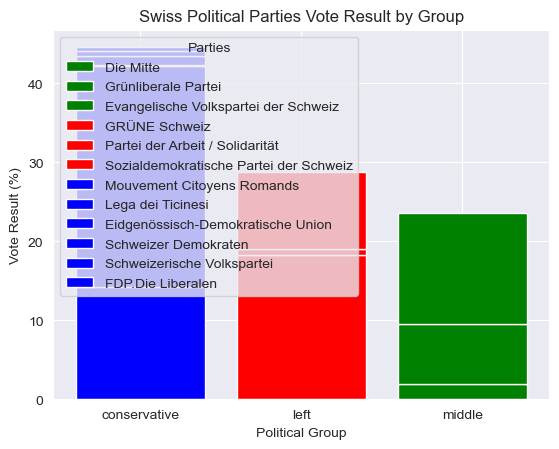

In [10]:
#Version one - abandoned
groups = df.groupby('group')

fig, ax = plt.subplots()

colors = {'left': 'red','middle': 'green','conservative': 'blue'}

# Stacking bars within each group
for group_name, group_data in groups:
    bottom_height = 0
    for _, row in group_data.iterrows():
        ax.bar(group_name, row['vote_result'], bottom=bottom_height, color=colors[group_name], edgecolor='white', label=row['name'])
        bottom_height += row['vote_result']

# Adding labels and title
ax.set_xlabel('Political Group')
ax.set_ylabel('Vote Result (%)')
ax.set_title('Swiss Political Parties Vote Result by Group')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Parties', loc='upper left')

plt.show()

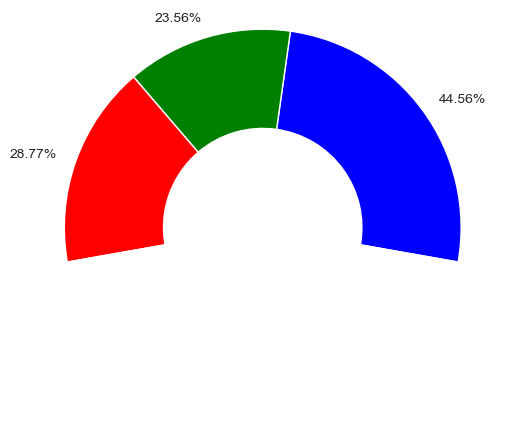

In [11]:
grouped_data = df.groupby('group')['vote_result'].sum()


total_votes = grouped_data.sum()
grouped_data[''] = total_votes / 1.25  # Make the empty half equal to the sum of the other half
colors[''] = (1, 1, 1, 0)  # Transparent color
grouped_data = grouped_data.reindex(["conservative", "middle", "left", ''])
labels = [f'{percentage:.2f}%' for group, percentage in grouped_data.items() if group != '']
labels += ['']

# Creating the half-donut chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(grouped_data, labels=labels, colors=[colors[key] for key in grouped_data.index],
                       wedgeprops=dict(width=0.5), startangle=-10)

# Adjusting the start angle so 'left' starts on the left
ax.set(aspect="equal")
ax.set_ylim(1.09, 1.1)  # Only show the top half
plt.show()

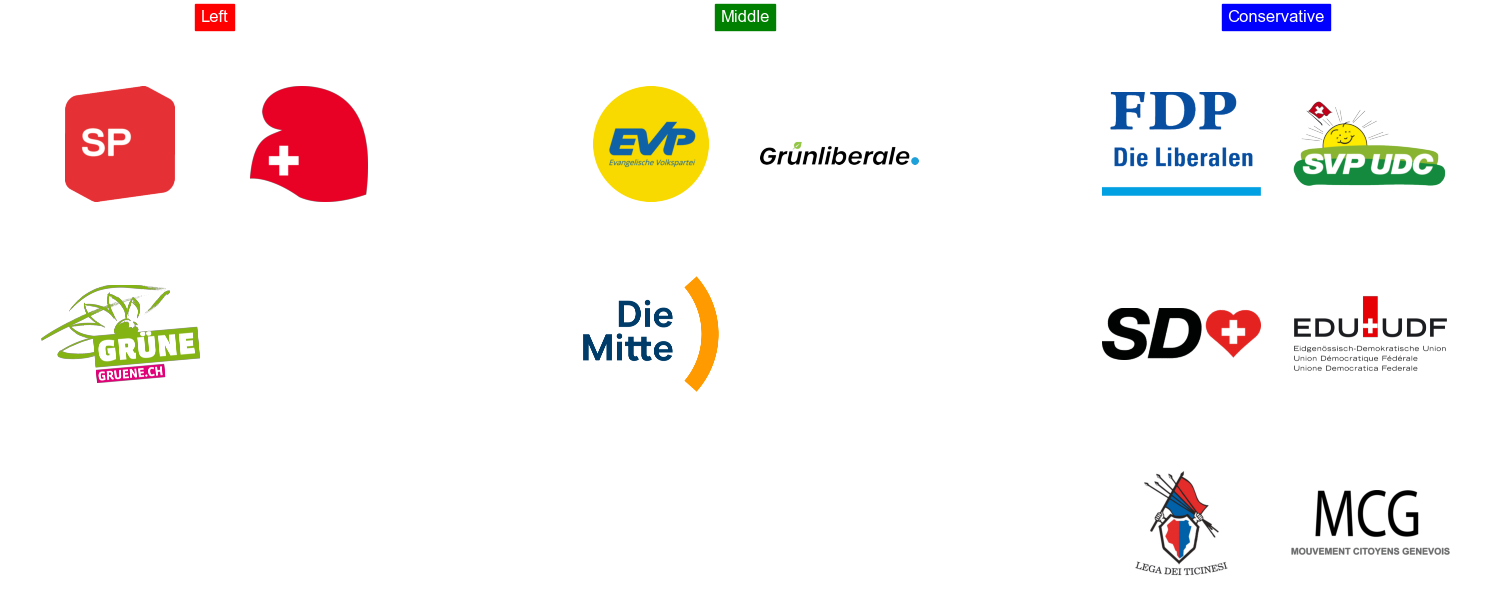

In [47]:
logos = {
    'FDP.Die Liberalen': 'party_logos/fdp.png', 
    'Sozialdemokratische Partei der Schweiz': 'party_logos/sp.gif', 
    'Schweizerische Volkspartei': 'party_logos/svp.gif',
    'GRÜNE Schweiz': 'party_logos/gruene.png',
    'Grünliberale Partei': 'party_logos/glp.png',
    'Evangelische Volkspartei der Schweiz': 'party_logos/evp.png',
    'Die Mitte': 'party_logos/Mitte.png',
    'Mouvement Citoyens Romands': 'party_logos/mcg.png',
    'Lega dei Ticinesi': 'party_logos/lega.jpeg',
    'Partei der Arbeit / Solidarität': 'party_logos/pda.png',
    'Schweizer Demokraten': 'party_logos/sd.png',
    'Eidgenössisch-Demokratische Union': 'party_logos/edu.png',
}
party_to_group = df.set_index('name')['group'].to_dict()
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Define fixed size for all logos based on a 2x3 grid (the most dense grid we have)
# We assume the most logos we can have in a row or column is 3
max_logos_per_row = 2
max_logos_per_col = 3

# Calculate the size for each logo
logo_width = (1 - image_padding * (max_logos_per_row + 1)) / max_logos_per_row
logo_height = (1 - image_padding * (max_logos_per_col + 1)) / max_logos_per_col

# Function to calculate the grid layout based on the number of logos
def calculate_grid(n_logos):
    if n_logos <= 4:
        return 2, 2  # 2x2 grid for up to 4 logos
    else:
        return 3, 2  # 2x3 grid for more than 4 logos

# Iterate through each group and subplot
for ax, (group, color) in zip(axs, colors.items()):
    ax.set_title(group.capitalize(), color='white', backgroundcolor=color, pad=20)
    ax.axis('off')  # Turn off the axis

    # Get logos for the current group
    group_logos = [(party, logos[party]) for party, party_group in party_to_group.items() if party_group == group]

    # Calculate the grid layout
    n_logos = len(group_logos)
    n_rows, n_cols = calculate_grid(n_logos)

    # Place logos in the subplot
    for i, (party, logo_path) in enumerate(group_logos):
        # Calculate the row and column position
        row = i // n_cols
        col = i % n_cols

        # Calculate position for this logo
        left = image_padding + col * (logo_width + image_padding)
        bottom = 1 - (row + 1) * (logo_height + image_padding) - row * image_padding

        # Create an inset axis for the logo with fixed size
        logo_ax = ax.inset_axes([left, bottom, logo_width, logo_height])
        img = plt.imread(logo_path)
        logo_ax.imshow(img)
        logo_ax.axis('off')  # Turn off the axis for the logo

# Adjust layout with padding
plt.tight_layout()
fig.subplots_adjust(wspace=subplot_padding)  # Adjust the space between subplots
plt.show()